# Práctica: Análise de Datos Temporais con Pandas


Nesta práctica, traballaredes con datos do Instituto Nacional de Estatística (INE) sobre a evolución dos prezos do IPC de diferentes produtos. 

Sobre o dataset:

- Índice: expresa un valor en base 100 (sobre un ano de referencia).
- Variación anual: compara o mes actual co o mesmo mes do ano anterior.
- Variación en lo que va de año: compara o mes actual co mes de xaneiro do mesmo ano.
- Vairación mensual: compara o valor co mes anterior.

## Preparación

- Descarga dos datos: Accede á ligazón proporcionada e descarga os datos en calquer formato compatible con Pandas (XML, CSV, JSON) [https://datos.gob.es/es/catalogo/ea0010587-indices-nacionales-de-clases-ipc-identificador-api-509041](https://datos.gob.es/es/catalogo/ea0010587-indices-nacionales-de-clases-ipc-identificador-api-509041)

- Utiliza un entorno conda que teña instalado ``pandas`` e ``matplotlib``.

## Descrición

1. Utiliza ``pandas`` para cargar os datos nun DataFrame e preparalos para a análise.
    Ten en conta que será necesario preprocesar o dataset para o correcto funcionamiento do DataFrame. Douche unhas pistas: 
    - As datas están organizadas en sentido inverso, é decir aparecen primeiro as datas mais recentes. 
    - Por defecto o valor das datas é un string, deberás formatearlo correctamente para que o DataFrame o identifique en formato ``datetime``.
    - Os valores no campo "Total" separan os valores decimais por ",", para poder facer o casting a float debedes camialos por ".".

2. Determina os 5 produtos que máis incrementaron de prezo no ano 2024. (Usa o tipo de dato "Variación anual")

3. Representa a evolución do valor do tipo de dato "Índice" dos 5 produtos anteriores nunha gráfica. 

4. Determina o ano co máximo valor de incremento medio considerando todos os produtos. (Usa o tipo de dato "Variación anual")


## Entrega

Debedes entregar un script en Python onde se realicen todos os pasos descritos e engadir a gráfica obtenida en formato .png.



<h1>Imports que vamos a necesitar<h1>

In [68]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt


<h1>As datas están organizadas en sentido inverso, é decir aparecen primeiro as datas mais recentes.<h1>

In [69]:
df = pd.read_csv('ipc.csv',sep="\t")
print(df['Periodo'])

0         2025M01
1         2024M12
2         2024M11
3         2024M10
4         2024M09
           ...   
103039    2002M05
103040    2002M04
103041    2002M03
103042    2002M02
103043    2002M01
Name: Periodo, Length: 103044, dtype: object


<h1>Por defecto o valor das datas é un string, deberás formatearlo correctamente para que o DataFrame o identifique en formato ``datetime``.<h1>

In [70]:
df['Periodo'] = pd.to_datetime(df['Periodo'], format='%YM%m')
print(df['Periodo'])

0        2025-01-01
1        2024-12-01
2        2024-11-01
3        2024-10-01
4        2024-09-01
            ...    
103039   2002-05-01
103040   2002-04-01
103041   2002-03-01
103042   2002-02-01
103043   2002-01-01
Name: Periodo, Length: 103044, dtype: datetime64[ns]


<h1>Os valores no campo "Total" separan os valores decimais por ",", para poder facer o casting a float debedes camialos por ".".<h1>


In [71]:
df['Total'] = df['Total'].str.replace(',', '.')
df['Total'] = pd.to_numeric(df['Total'], errors='coerce').astype(np.float32)
df['Total']

0         116.733002
1         116.533997
2         116.010002
3         115.725998
4         115.009003
             ...    
103039      2.300000
103040      2.200000
103041      2.200000
103042      1.900000
103043      1.500000
Name: Total, Length: 103044, dtype: float32

<h1>Determina os 5 produtos que máis incrementaron de prezo no ano 2024. (Usa o tipo de dato "Variación anual")<h1>

In [82]:
# Filter the dataframe for the year 2024 and "Variación anual"
df_2024 = df[(df['Periodo'].dt.year == 2024) & (df['Tipo de dato'] == 'Variación anual')]

# Sort the dataframe by the "Total" column in descending order and select the top 5 entries
top_5_productos = df_2024.nlargest(5, 'Total')
top_5_productos['Periodo'] = top_5_productos['Periodo'].dt.strftime('%Y')
print(top_5_productos)


                     Clases     Tipo de dato Periodo      Total
6103  0115 Aceites y grasas  Variación anual    2024  49.099998
6104  0115 Aceites y grasas  Variación anual    2024  49.099998
6105  0115 Aceites y grasas  Variación anual    2024  46.200001
6102  0115 Aceites y grasas  Variación anual    2024  45.500000
6106  0115 Aceites y grasas  Variación anual    2024  43.200001


<h1>Representa a evolución do valor do tipo de dato "Índice" dos 5 produtos anteriores nunha gráfica.<h1>

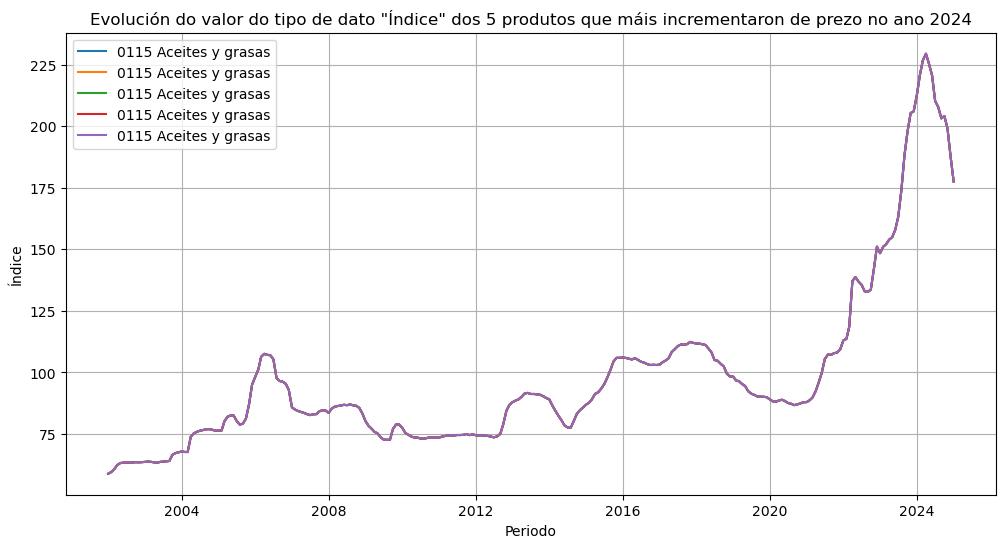

In [87]:
# Filtrar o dataframe orixinal para obter os datos dos 5 produtos anteriores
productos_indices = df[(df['Clases'].isin(top_5_productos['Clases'])) & (df['Tipo de dato'] == 'Índice')]

# Crear a gráfica
plt.figure(figsize=(12, 6))
for producto in top_5_productos['Clases']:
    producto_data = productos_indices[productos_indices['Clases'] == producto]
    plt.plot(producto_data['Periodo'], producto_data['Total'], label=producto)

# Engadir etiquetas e título
plt.xlabel('Periodo')
plt.ylabel('Índice')
plt.title('Evolución do valor do tipo de dato "Índice" dos 5 produtos que máis incrementaron de prezo no ano 2024')
plt.legend()
plt.grid(True)
plt.show()